# Lead Compensator Design - Example

In [1]:
import numpy as np
import math
import control as ct
import matplotlib.pyplot as plt

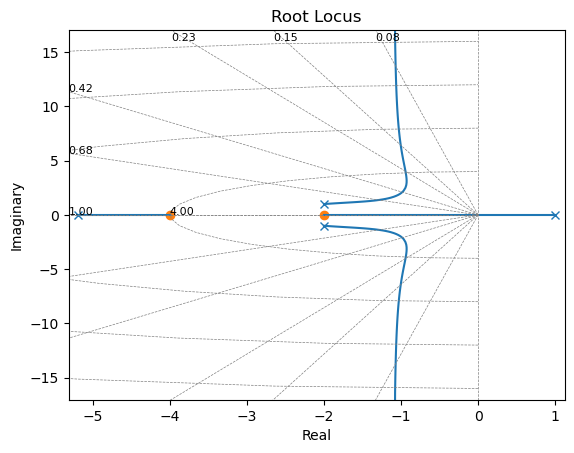

In [6]:
P = ct.tf([1, 2], [1, 3, 1, -5])
K_ld = 7.29
K = ct.tf([K_ld*1, K_ld*4], [1, 5.19])
L = P*K
cl_poles, gain = ct.root_locus(L)

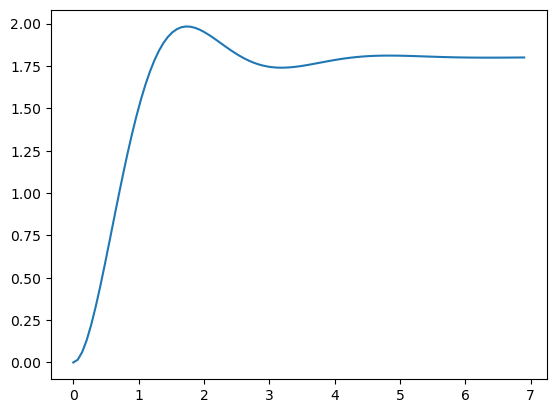

In [7]:
T = P*K/(1+P*K)
t,y = ct.step_response(T)
fig,ax = plt.subplots(1)
ax.plot(t,y)

In [5]:
1/np.sqrt(13*5/21.6/8/2/10)

7.291723443002399

In [4]:
1.5-np.sqrt(1.5**2-1)

0.3819660112501051

In [22]:
a = complex(-4,1)
p1 = complex(-0.1,-1)
p2 = complex(-0.1,1)
z1 = -3
M1 = np.abs(a-p1)
angle1 = np.angle(a-p1)

M2 = np.abs(a-p2)
angle2 = np.angle(a-p2)

M3 = np.abs(a-z1)
angle3 = np.angle(a-z1)

In [23]:
print(M1)
print(angle1*180/np.pi)

print(M2)
print(angle2*180/np.pi)

print(M3)
print(angle3*180/np.pi)

4.382921400162226
152.85031830221683
3.9
180.0
1.4142135623730951
135.0


In [26]:
(-angle1-angle2+angle3)*180/np.pi + 180

-17.850318302216806

In [28]:
(-angle1-angle2+angle3)*180/np.pi + 45 + 180

27.149681697783194

In [30]:
1/math.tan(27*np.pi/180)

1.9626105055051506

In [37]:
z2 = -5.96
M5 = np.abs(a-z2)
angle5 = np.angle(a-z2)
print(M5)
print(angle5*180/np.pi)

2.2003636063160106
27.030860259842985


# Example 2

Text(0.5, 0, 'Time (s)')

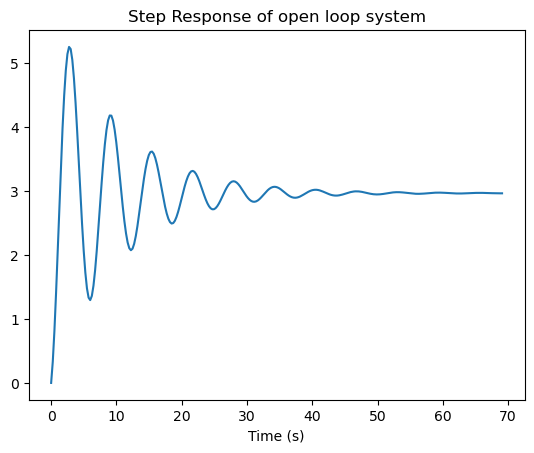

In [3]:
P = ct.tf([1, 3], [1, 0.2, 1.01])

t, y_step = ct.step_response(P)
fig,ax = plt.subplots(1)
ax.plot(t,y_step)
ax.set_title('Step Response of open loop system')
ax.set_xlabel('Time (s)')


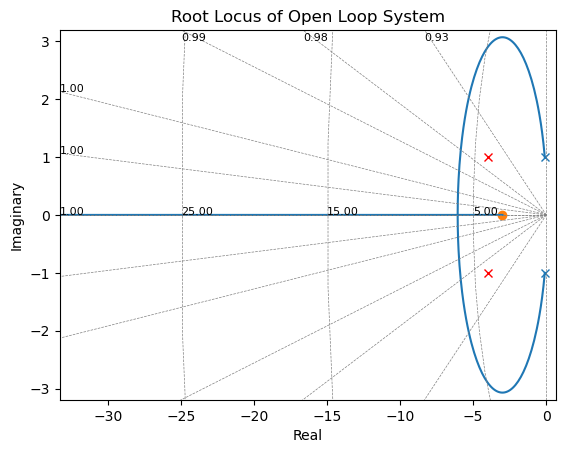

In [4]:
fig,ax = plt.subplots(1)
cl_poles, gain = ct.root_locus(P)
ax.set_title('Root Locus of Open Loop System')
ax.plot(-4,1,'rx')
ax.plot(-4,-1,'rx')

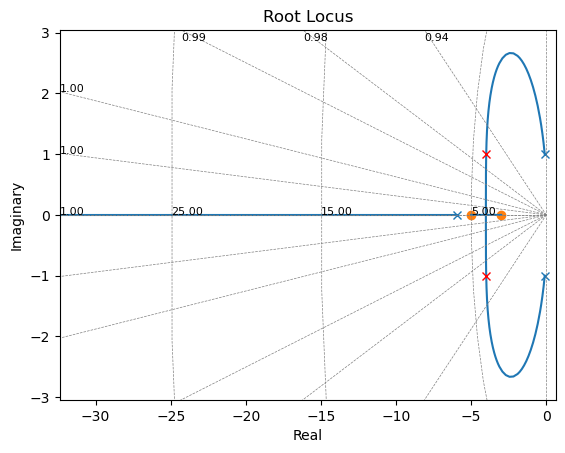

In [76]:

K = ct.tf([1, 5], [1, 5.96])

fig,ax = plt.subplots(1)
cl_poles, gain = ct.root_locus(P*K)
ax.plot(-4,1,'rx')
ax.plot(-4,-1,'rx')
ax.set_title('Root Locus of Closed-Loop System')

In [39]:
Kld = 1/(2/4.38/3.9/2.2)
print(Kld)

18.790200000000002


{'RiseTime': 0.08290964527684097,
 'SettlingTime': 0.8705512754068303,
 'SettlingMin': 0.882151770256693,
 'SettlingMax': 1.0712147391688343,
 'Overshoot': 9.455625482825784,
 'Undershoot': 0,
 'Peak': 1.0712147391688343,
 'PeakTime': 0.2763654842561366,
 'SteadyStateValue': 0.9786749054180993}

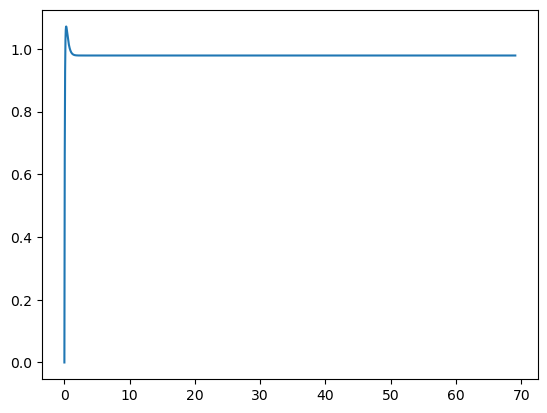

In [32]:
Kld = 18.17
P = ct.tf([1, 3], [1, 0.2, 1.01])
K = ct.tf([Kld*1, Kld*5], [1, 5.88])

S = 1/(1+P*K)
T = P*K/(1+P*K)

t,y = ct.step_response(T)
fig,ax = plt.subplots(1)
ax.plot(t,y)
ax.set_title('Step Response of closed loop system')
ax.set_xlabel('Time (s)')

ct.step_info(T)

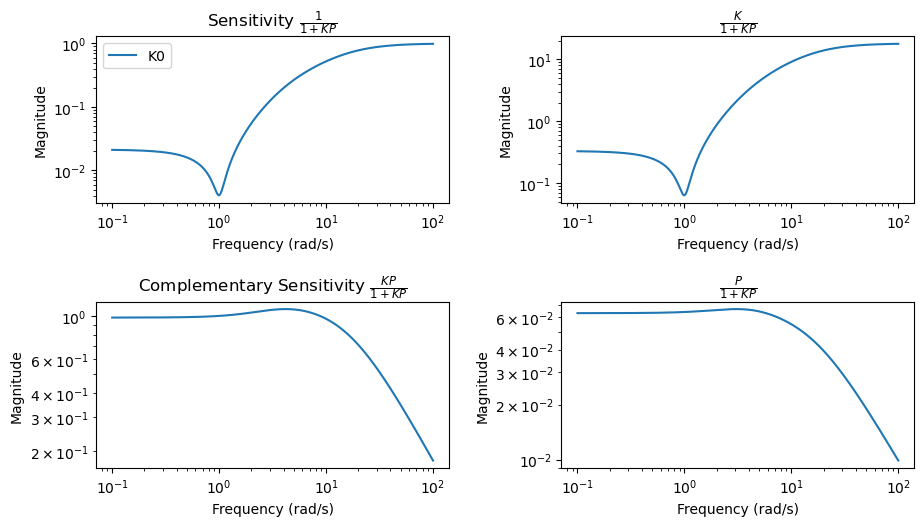

In [33]:
def plot_gang_of_four(P,K):
    num_sys = len(K)
    fig, ax = plt.subplots(2,2, figsize=(10,6))
    fig.tight_layout(pad=5.0)

    for ii in range(num_sys):
        T = P*K[ii]/(1+P*K[ii])
        S = 1/(1+P*K[ii])
        SK = K[ii]*S 
        SP = P*S 

        mag_S, phase_S, w_S = ct.bode_plot(S,plot=False)
        mag_T, phase_T, w_T = ct.bode_plot(T,plot=False)
        mag_SK, phase_SK, w_SK = ct.bode_plot(SK,plot=False)
        mag_SP, phase_SP, w_SP = ct.bode_plot(SP,plot=False)

        label_str = 'K' + str(ii)
        ax[0,0].loglog(w_S,mag_S, label=label_str)
        ax[0,0].set_title(r'Sensitivity $\frac{1}{1+KP}$')
        ax[0,0].legend()
        ax[0,0].set_xlabel('Frequency (rad/s)')
        ax[0,0].set_ylabel('Magnitude')
       
        ax[1,0].loglog(w_T,mag_T)
        ax[1,0].set_title(r'Complementary Sensitivity $\frac{KP}{1+KP}$')
        ax[1,0].set_xlabel('Frequency (rad/s)')
        ax[1,0].set_ylabel('Magnitude')

        ax[0,1].loglog(w_SK,mag_SK)
        ax[0,1].set_title(r'$\frac{K}{1+KP}$')
        ax[0,1].set_xlabel('Frequency (rad/s)')
        ax[0,1].set_ylabel('Magnitude')

        ax[1,1].loglog(w_SP,mag_SP)
        ax[1,1].set_title(r'$\frac{P}{1+KP}$')
        ax[1,1].set_xlabel('Frequency (rad/s)')
        ax[1,1].set_ylabel('Magnitude')

    return fig, ax

fig, ax = plot_gang_of_four(P,[K])

In [51]:
a = complex(-4,2)
p1 = complex(-0.1,-1)
p2 = complex(-0.1,1)

M1 = np.abs(a-p1)
angle1 = np.angle(a-p1)

M2 = np.abs(a-p2)
angle2 = np.angle(a-p2)



print(M1)
print(angle1*180/np.pi)

print(M2)
print(angle2*180/np.pi)



4.920365840057018
142.43140797117252
4.026164427839479
165.6186054089094


In [53]:
-142-165+180

-127

In [54]:
127/2

63.5

In [56]:
2/math.tan(70/180*np.pi)

0.7279404685324049

In [63]:
(-307+70*2+180)/2

6.5

In [64]:
2/math.tan(6.5/180*np.pi)

17.553774713739916

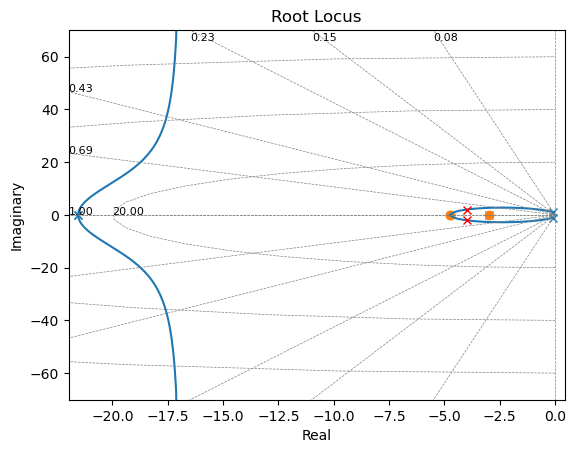

In [67]:
K1 = ct.tf(1,[1, 3])
K2 = ct.tf([1, 4.73], [1, 21.55])

fig,ax = plt.subplots(1)
cl_poles, gain = ct.root_locus(P*K1*K2*K2)
ax.plot(-4,2,'rx')
ax.plot(-4,-2,'rx')

In [74]:
a = complex(-4,2)
zk = -4.73
pk = -21.55

M1 = np.abs(a-pk)
angle1 = np.angle(a-pk)

M2 = np.abs(a-zk)
angle2 = np.angle(a-zk)



print(M1)
print(angle1*180/np.pi)

print(M2)
print(angle2*180/np.pi)


17.663592499828567
6.501386073861868
2.1290608258102917
69.94791785390144


In [71]:
1/(2.12**2/6.5**2/4.92/4.02)

185.92857778568882

{'RiseTime': 0.27636548425613733,
 'SettlingTime': 2.5287441809436566,
 'SettlingMin': 4.2954330428992895,
 'SettlingMax': 6.297575335622112,
 'Overshoot': 32.731674416930986,
 'Undershoot': 0,
 'Peak': 6.297575335622112,
 'PeakTime': 0.7600050817043776,
 'SteadyStateValue': 4.744591193689338}

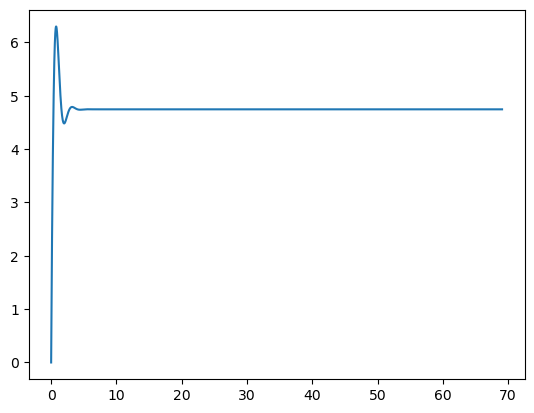

In [72]:
Kld2 = 185.93*K2*K2*K1

S = 1/(1+P*Kld2)
T = P*K/(1+P*Kld2)

t,y = ct.step_response(T)
fig,ax = plt.subplots(1)
ax.plot(t,y)

ct.step_info(T)

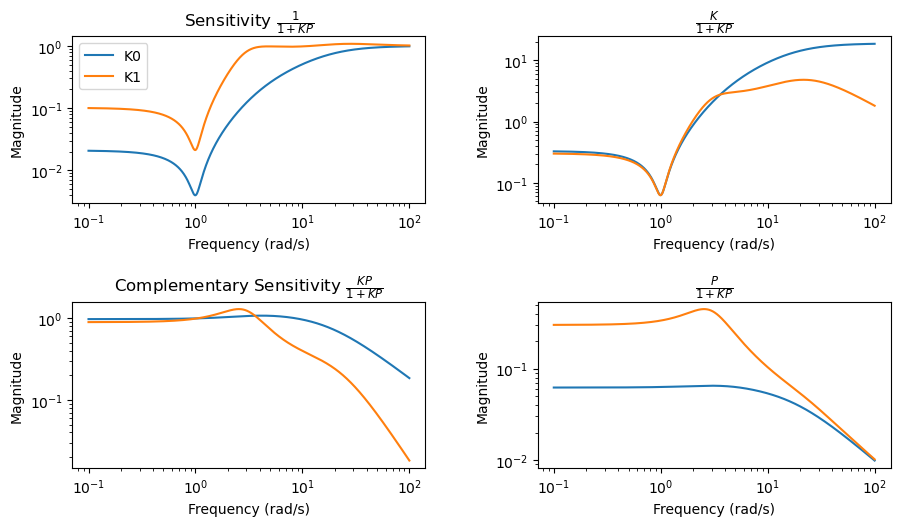

In [73]:
def plot_gang_of_four(P,K):
    num_sys = len(K)
    fig, ax = plt.subplots(2,2, figsize=(10,6))
    fig.tight_layout(pad=5.0)

    for ii in range(num_sys):
        T = P*K[ii]/(1+P*K[ii])
        S = 1/(1+P*K[ii])
        SK = K[ii]*S 
        SP = P*S 

        mag_S, phase_S, w_S = ct.bode_plot(S,plot=False)
        mag_T, phase_T, w_T = ct.bode_plot(T,plot=False)
        mag_SK, phase_SK, w_SK = ct.bode_plot(SK,plot=False)
        mag_SP, phase_SP, w_SP = ct.bode_plot(SP,plot=False)

        label_str = 'K' + str(ii)
        ax[0,0].loglog(w_S,mag_S, label=label_str)
        ax[0,0].set_title(r'Sensitivity $\frac{1}{1+KP}$')
        ax[0,0].legend()
        ax[0,0].set_xlabel('Frequency (rad/s)')
        ax[0,0].set_ylabel('Magnitude')
       
        ax[1,0].loglog(w_T,mag_T)
        ax[1,0].set_title(r'Complementary Sensitivity $\frac{KP}{1+KP}$')
        ax[1,0].set_xlabel('Frequency (rad/s)')
        ax[1,0].set_ylabel('Magnitude')

        ax[0,1].loglog(w_SK,mag_SK)
        ax[0,1].set_title(r'$\frac{K}{1+KP}$')
        ax[0,1].set_xlabel('Frequency (rad/s)')
        ax[0,1].set_ylabel('Magnitude')

        ax[1,1].loglog(w_SP,mag_SP)
        ax[1,1].set_title(r'$\frac{P}{1+KP}$')
        ax[1,1].set_xlabel('Frequency (rad/s)')
        ax[1,1].set_ylabel('Magnitude')

    return fig, ax

fig, ax = plot_gang_of_four(P,[K, Kld2])

In [5]:
4/0.382

10.471204188481675

In [16]:
a = complex(-4,8)
p1 = complex(-0.1,-1)
p2 = complex(-0.1,1)

M1 = np.abs(a-p1)
angle1 = np.angle(a-p1)

M2 = np.abs(a-p2)
angle2 = np.angle(a-p2)



print(M1)
print(angle1*180/np.pi)

print(M2)
print(angle2*180/np.pi)


9.808669634563088
113.4286928087454
8.01311425102625
119.12405349477743


In [19]:
-angle1*180/np.pi-angle2*180/np.pi+180

-52.55274630352284

In [20]:
8/math.tan(60*np.pi/180)

4.618802153517008

In [21]:
60-52.5

7.5

In [22]:
8/math.tan(7.5*np.pi/180)

60.76603290180121

In [24]:
a = complex(-4,8)
p1 = -8.62
p2 = -64.77

M1 = np.abs(a-p1)
angle1 = np.angle(a-p1)

M2 = np.abs(a-p2)
angle2 = np.angle(a-p2)


print(M1)
print(angle1*180/np.pi)

print(M2)
print(angle2*180/np.pi)


9.238203288518823
59.993566209540916
61.29431376563408
7.499515969125194


In [25]:
1/(9.24/8.01/9.8/61)

518.2227272727273

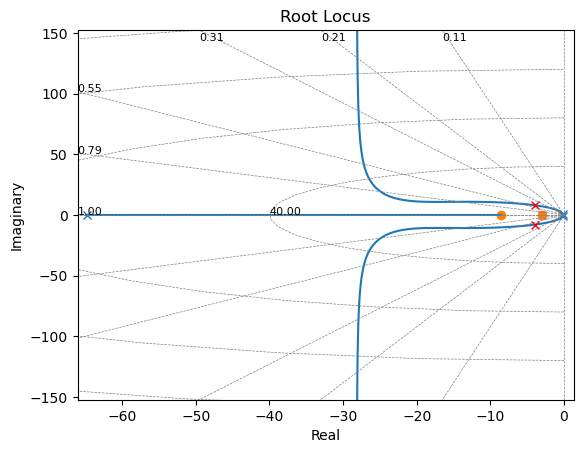

In [30]:
Kld2 = 518
K2a = ct.tf(1,[1, 3])
K2b = ct.tf([Kld2*1, Kld2*8.62], [1, 64.77])
K2 = K2a*K2b

fig,ax = plt.subplots(1)
cl_poles, gain = ct.root_locus(P*K2b*K2a)
ax.plot(-4,8,'rx')
ax.plot(-4,-8,'rx')

[-64.77      +0.j         -57.03586681+0.j
  -3.96706659+7.98099109j  -3.96706659-7.98099109j
  -3.00000014+0.j          -2.99999986+0.j
  -0.1       +1.j          -0.1       -1.j        ]


[-64.77      +0.j  -8.62      +0.j  -3.00000011+0.j  -2.99999989+0.j
  -0.1       +1.j  -0.1       -1.j]


{'RiseTime': 0.11054619370245436,
 'SettlingTime': 0.870551275406828,
 'SettlingMin': 0.9085196529600068,
 'SettlingMax': 1.352396961129014,
 'Overshoot': 37.221051734739135,
 'Undershoot': 0,
 'Peak': 1.352396961129014,
 'PeakTime': 0.2763654842561359,
 'SteadyStateValue': 0.9855608480128263}

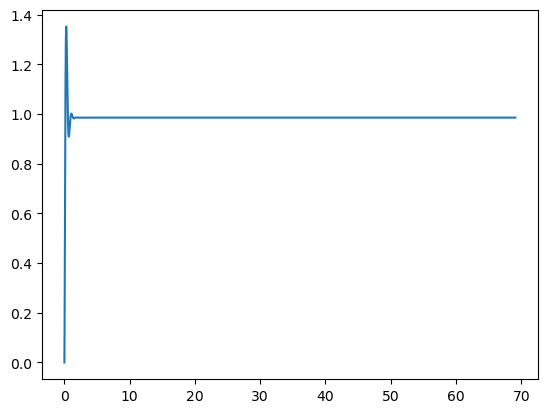

In [36]:
S2 = 1/(1+P*K2)
T2 = P*K2/(1+P*K2)

print(T2.poles())

print('\n')

print(T2.zeros())

t,y = ct.step_response(T2)
fig,ax = plt.subplots(1)
ax.plot(t,y)

ct.step_info(T2)

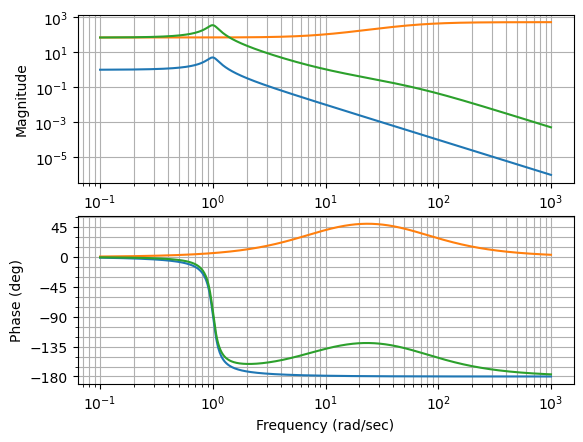

In [38]:
mag,phase,omega = ct.bode_plot([K2a*P, K2b, K2*P])

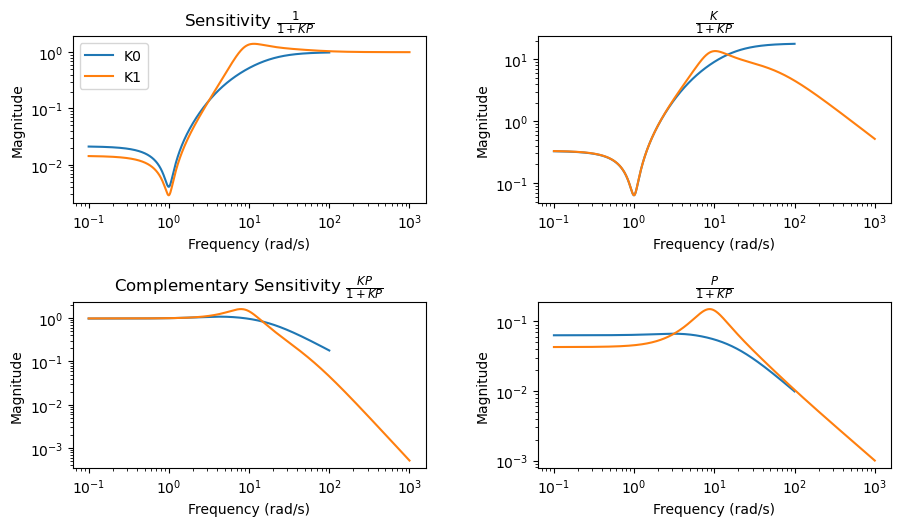

In [34]:
fig, ax = plot_gang_of_four(P,[K, K2])

5.395517174319137

5.491812087098393

7.340252086777534